### Algorithm Implemented

In [1]:
def max_substring(a: str, b: str) -> str:
    n =len(a)
    m = len(b)
    lengths = [[0] * (m + 1) for x in range(n + 1)]
    max_length = 0
    end_index = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                lengths[i][j] = lengths[i - 1][j - 1] + 1
                if lengths[i][j] > max_length:
                    max_length = lengths[i][j]
                    end_index = i
            else:
                lengths[i][j] = 0
    
    return a[end_index - max_length:end_index]

    ### the return statement is equivalent to the following code: ###
    # ret = ""
    # for i in range(end_index-max_length, end_index):
    #     ret += a[i]
    # return ret


In [2]:
# simple test
print(max_substring("apple", "pineapple")) # "apple"

apple


### Testing

In [3]:
import unittest

class TestAlgo(unittest.TestCase):
    def test_common_substring(self):
        self.assertEqual(max_substring("pineapple", "apple"), "apple")
        self.assertEqual(max_substring("banana", "apple"), "a")
        self.assertEqual(max_substring("orange", "banana"), "an")
    
    def test_no_common_substring(self):
        self.assertEqual(max_substring("xyz", "abc"), "")
    
    def test_identical_strings(self):
        self.assertEqual(max_substring("hello", "hello"), "hello")
    
    def test_single_character_overlap(self):
        self.assertEqual(max_substring("x", "x"), "x")
        self.assertEqual(max_substring("x", "y"), "")
    
    def test_substring_at_start(self):
        self.assertEqual(max_substring("abcdef", "abc"), "abc")
    
    def test_substring_at_end(self):
        self.assertEqual(max_substring("abcdef", "def"), "def")

    def test_substring_in_middle(self):
        self.assertEqual(max_substring("abcdef", "cde"), "cde")
    
    def test_large_strings(self):
        self.assertEqual(max_substring("a" * 1000 + "bcd", "xyz" + "bcd"), "bcd")

    def test_empty_string(self):
        self.assertEqual(max_substring("", "abc"), "")
        self.assertEqual(max_substring("abc", ""), "")
        self.assertEqual(max_substring("", ""), "")

In [4]:
# test
unittest.main(argv=[''], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.004s

OK


### Benchmarking

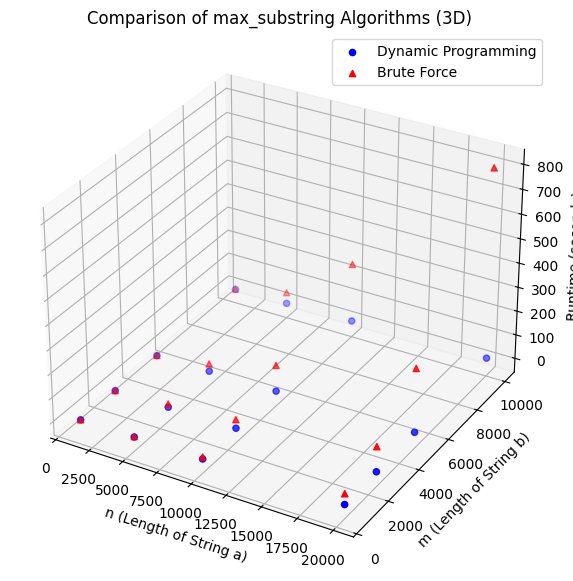

In [12]:
import time
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

def max_substring_brute_force(a: str, b: str) -> str:
    max_sub = ""
    for i in range(len(a)):
        for j in range(i, len(a)):
            sub = a[i:j+1]
            if sub in b and len(sub) > len(max_sub):
                max_sub = sub
    return max_sub

def benchmark_max_substring():
    input_sizes = [(n, m) for n in [1000, 5000, 10000, 20000] for m in [500, 2500, 5000, 10000]]
    runtimes_dp = []
    runtimes_brute = []

    for n, m in input_sizes:
        a = generate_random_string(n)
        b = generate_random_string(m)

        start_time = time.time()
        max_substring(a, b)
        end_time = time.time()
        runtimes_dp.append(end_time - start_time)

        start_time = time.time()
        max_substring_brute_force(a, b)
        end_time = time.time()
        runtimes_brute.append(end_time - start_time)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    n_values = np.array([n for n, m in input_sizes])
    m_values = np.array([m for n, m in input_sizes])

    ax.scatter(n_values, m_values, runtimes_dp, c='b', marker='o', label='Dynamic Programming')
    ax.scatter(n_values, m_values, runtimes_brute, c='r', marker='^', label='Brute Force')

    ax.set_xlabel("n (Length of String a)")
    ax.set_ylabel("m (Length of String b)")
    ax.set_zlabel("Runtime (seconds)")
    ax.set_title("Comparison of max_substring Algorithms (3D)")
    ax.legend()

    plt.show()

benchmark_max_substring()